# LANGUAGE DETECTION SYSTEM USING MACHINE LEARNING

In [31]:
#IMPORTING LIBRARIES

import pandas as pd
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import pipeline
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [32]:
#Loading data frames of different dataset
#df1=pd.read_csv('dataset.csv')
#df2=pd.read_csv('launguages1.csv')
df=pd.read_csv('filtered_languages.csv')

#concatenate datasets
#saving the combined dataset in different 

df=pd.concat([df1,df2,df3],ignore_index=True)
df.to_csv('df',index=False)
df

 # Exploratory Data Analysis (EDA)

In [33]:
#checking missing values
df['Text'].isnull().sum()

12

In [34]:
#handling punctuation data
def remove_pun(Text):
    if isinstance(Text,str):
        for pun in string.punctuation:
            Text=Text.replace(pun,"")
        Text=Text.lower()
    return Text

In [35]:
#filling the missing values with no space
df['Text']=df['Text'].fillna("")

In [36]:
#applying remove_pun function 
df['Text']=df['Text'].apply(remove_pun)
df

,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
16126,ਇਸ ਨੂੰ ipa ਵਿੱਚ ਲਿਖਿਆ ਜਾਵੇਗਾ,Punjabi
16127,ਇਸ ਕਾਨੂੰਨ ਦੀ ਉਦੇਸ਼ਕਾ ਵਿੱਚ ਇਹ ਐਕਟ ਬਣਾਉਣ ਦਾ ਉਦੇ...,Punjabi
16128,थोडे सोंस्था जोसि कि बोंबोइचें कोंकणी भाशा मों...,Konkani
16129,भारतस्य पूर्वभागे बाङ्ग्लादेशः बर्मादेशः बङ्ग...,Sanskrit


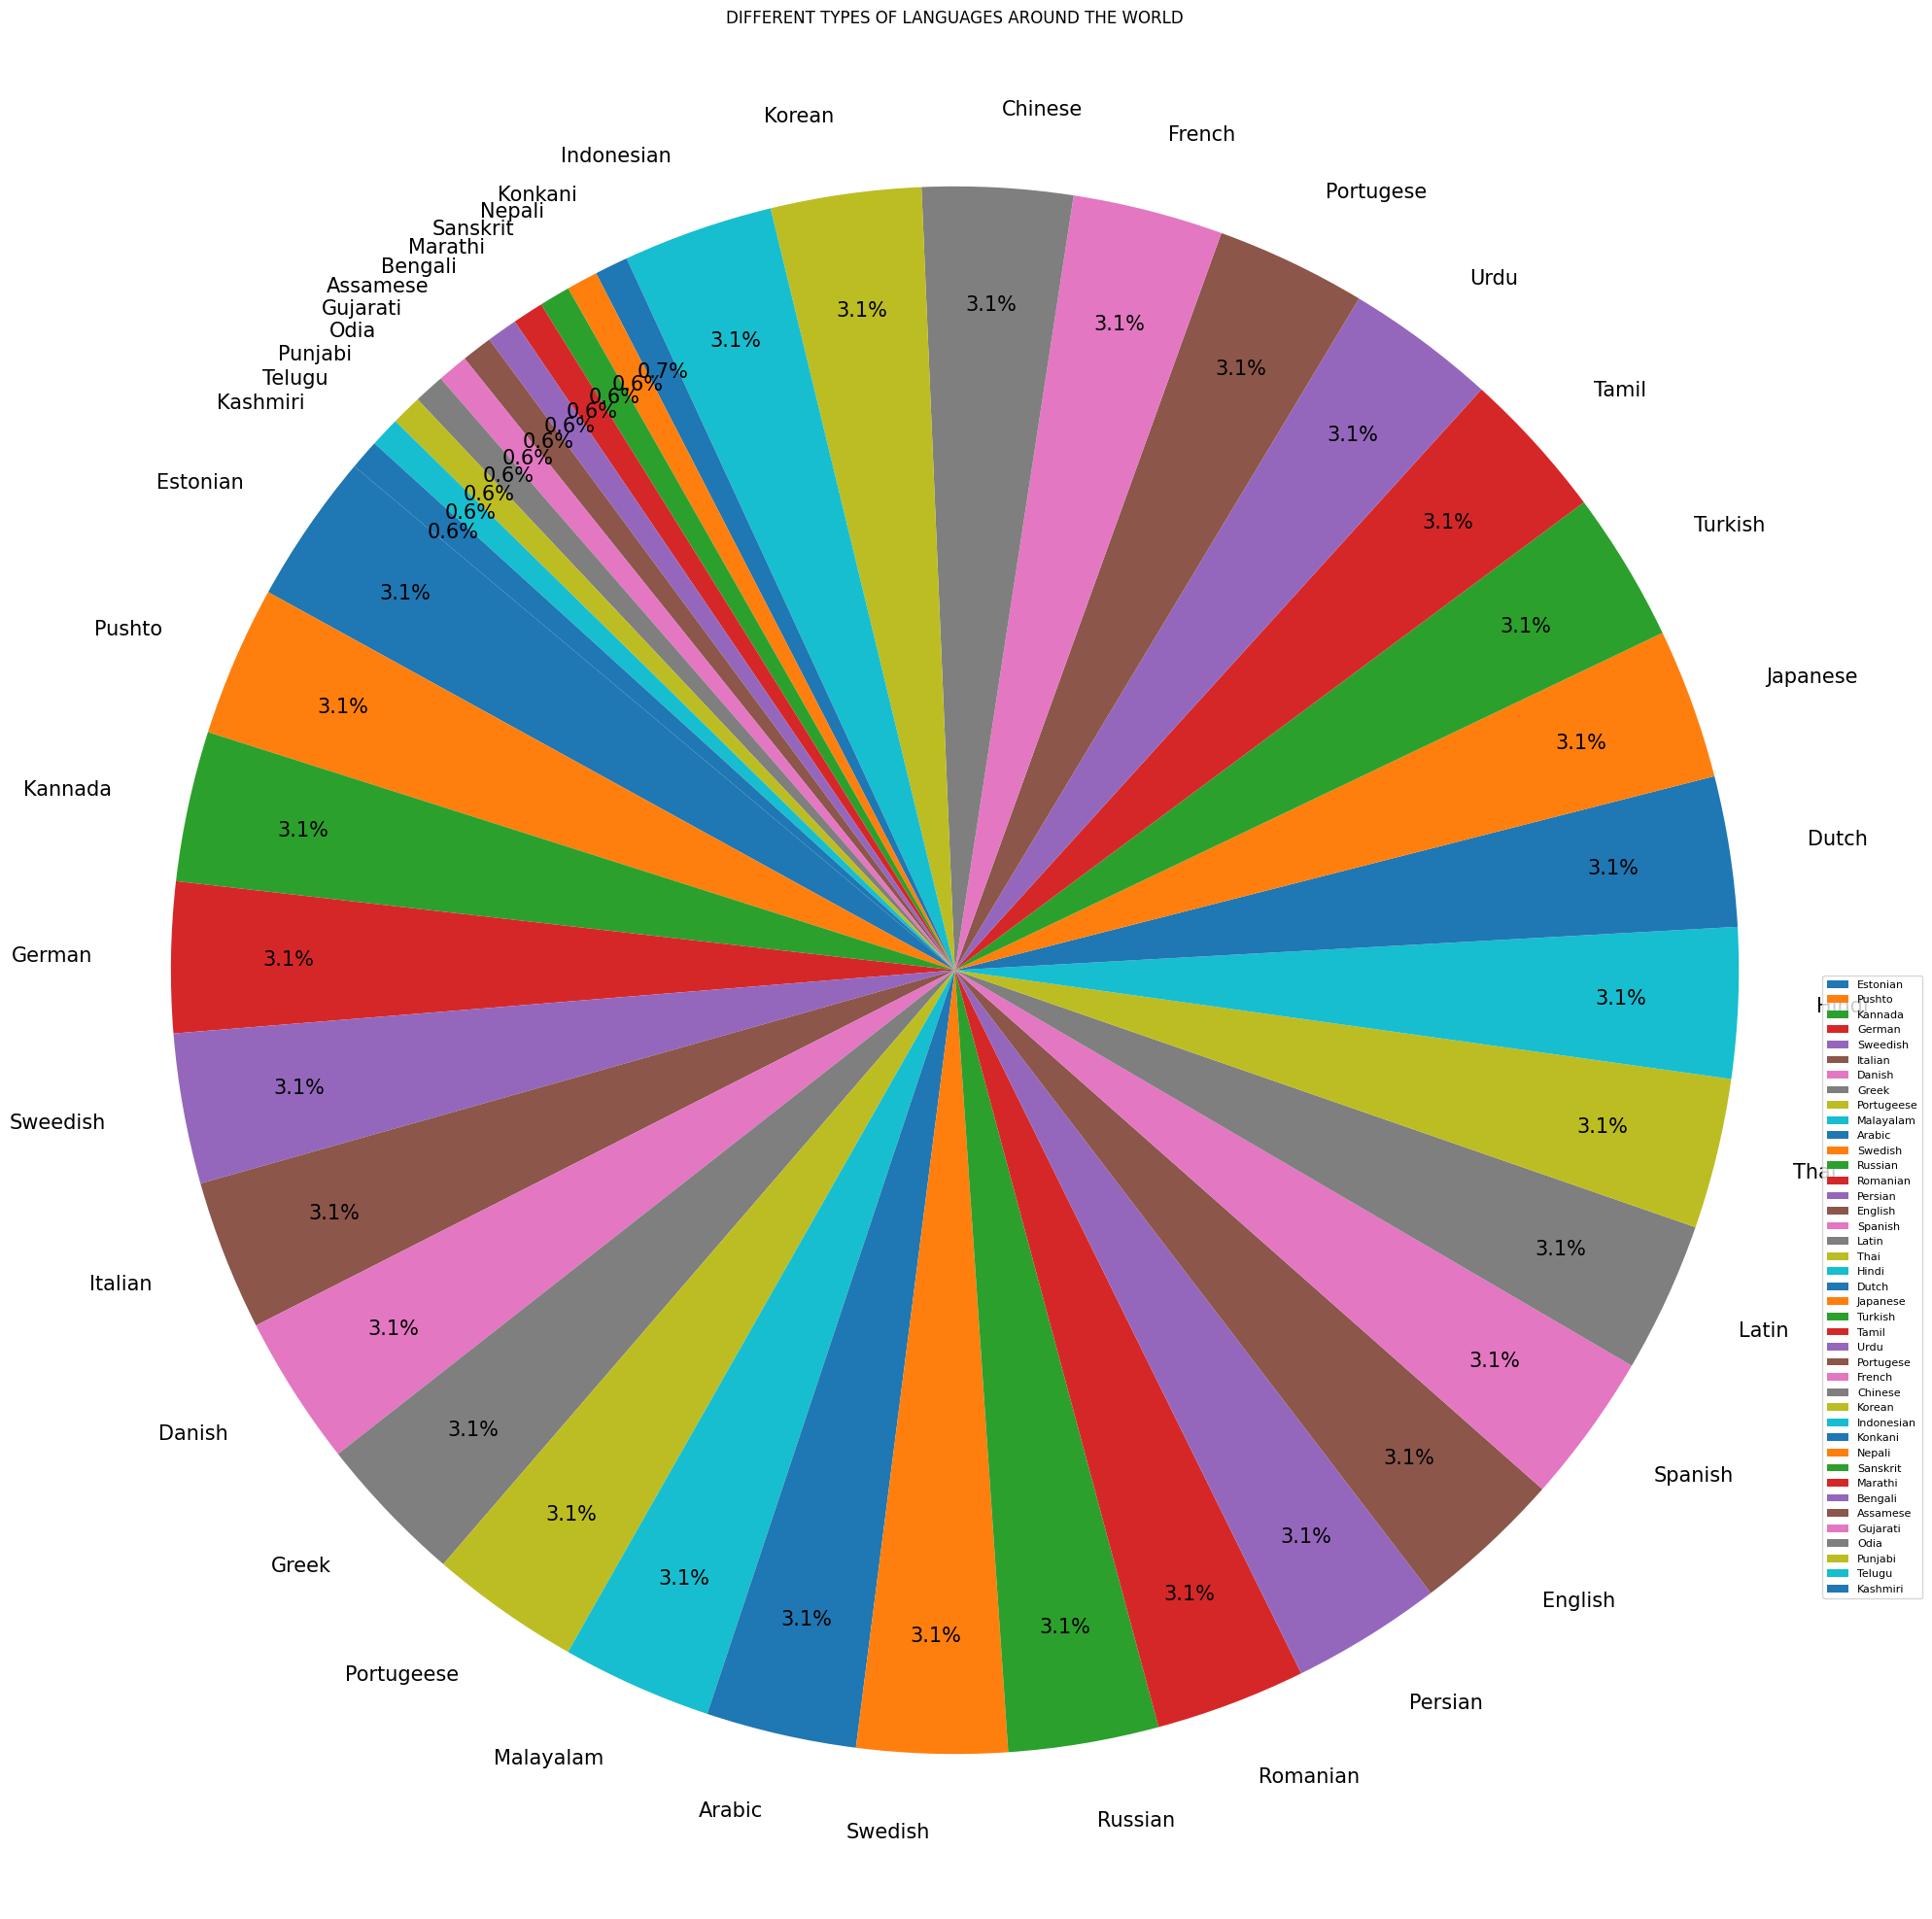

In [39]:
# For visualization
lang_count = df['Language'].value_counts()

plt.figure(figsize=(20, 20))  # Increase the figure size for better readability
# Using a pie chart
plt.pie(lang_count, labels=lang_count.index, autopct='%1.1f%%', startangle=140, 
        textprops={'fontsize': 15}, pctdistance=0.85)  # Adjust text size and position

plt.title('DIFFERENT TYPES OF LANGUAGES AROUND THE WORLD')
plt.legend(loc="best", fontsize=8, bbox_to_anchor=(1, 0.5))  # Use a legend to reduce label clutter
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [40]:
X=df.iloc[:,0]
Y=df.iloc[:,1]

In [41]:
Vectorizer = TfidfVectorizer()#Term frequency-Inverse Document Frequency

In [42]:
vec = TfidfVectorizer(ngram_range=(1, 2), analyzer='char')
vec

TfidfVectorizer(analyzer='char', ngram_range=(1, 2))

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [44]:
Vectorizer = TfidfVectorizer() #Term frequency-Inverse Document Frequency

In [45]:
X_train_tfidf = Vectorizer.fit_transform(X_train)
X_test_tfidf = Vectorizer.transform(X_test)

# Hyperparameter tuning using Random Search

model = RandomForestClassifier()

param_dist = {
    'n_estimators': [int(x) for x in range(100, 1100, 100)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in range(10, 110, 10)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, 
    n_iter=100, cv=5, verbose=2, 
    random_state=42, n_jobs=-1
)


random_search.fit(X_train_tfidf,Y_train)

# View the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

# Make predictions and evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)
print(classification_report(Y_test, y_pred))

# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the pipeline with a TF-IDF Vectorizer and the RandomForest model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', RandomForestClassifier())
])

model = RandomForestClassifier()
param_grid={
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Define the hyperparameter space to search
param_dist = {
    'n_estimators': randint(50, 200),          # Number of trees in the forest
    'max_depth': randint(3, 20),               # Maximum depth of the tree
    'min_samples_split': randint(2, 20),       # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 20),        # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],                # Whether bootstrap samples are used when building trees
}

# Define the RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, 
    n_iter=100, cv=5, verbose=2, 
    random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train,Y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_


Vectorizer = TfidfVectorizer();#Term frequency-Inverse Document Frequency

vec = TfidfVectorizer(ngram_range=(1, 2), analyzer='char')
vec

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train,Y_train)

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_train,Y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Test Set Accuracy: {test_accuracy}')

Vectorizer = TfidfVectorizer() #Term frequency-Inverse Document Frequency

vec = TfidfVectorizer(ngram_range=(1, 2), analyzer='char')
vec

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [47]:
# Define the models
decision_tree = DecisionTreeClassifier()
naive_bayes = MultinomialNB()
random_forest=RandomForestClassifier()
support_vector_machine=SVC()
knn=KNeighborsClassifier()
xgboost=XGBClassifier()

In [48]:
# Create a VotingClassifier to combine models
voting_clf = VotingClassifier(estimators=[
    ('DT', decision_tree),
    ('NB', naive_bayes),
    ('RF',random_forest),
    ('SVM',support_vector_machine),
    ('KNN',knn),
    ('XGB',xgboost)
],voting='hard')

In [49]:
# Create a pipeline with the vectorizer and the voting classifier
from sklearn.pipeline import Pipeline
model_pipe=Pipeline([
    ('vec',vec),
    ('clf',voting_clf)
])

In [50]:
model_pipe.fit(X_train,Y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('clf',
                 VotingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                                              ('NB', MultinomialNB()),
                                              ('RF', RandomForestClassifier()),
                                              ('SVM', SVC()),
                                              ('KNN', KNeighborsClassifier()),
                                              ('XGB',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=No...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))]))])

In [51]:
predict_value=model_pipe.predict(X_test)

In [52]:
metrics.accuracy_score(Y_test, predict_value)*100

97.58289432909824

In [53]:
model_pipe.predict(['the cdacian is here'])

array(['English'], dtype=object)

In [54]:
import pickle
update_file = open('project.pckl','wb')
pickle.dump(model_pipe,update_file)
update_file.close()

In [55]:
import os

In [56]:
os.listdir()

['.ipynb_checkpoints',
 'ABSTRACT.docx',
 'app.py',
 'apply.py',
 'dataset.csv',
 'df',
 'filtered_languages.csv',
 'Final_Demo.ipynb',
 'hyper_tuning_grid_search.txt',
 'hyper_tuning_RandomizedSearchCV.txt',
 'Language Detection final.csv',
 'Language Detection.csv',
 'launguages1.csv',
 'merged_languages (1).csv',
 'Model_Demo2.ipynb',
 'pro1_5_6.ipynb',
 'pro1_5_6_random_forest.ipynb',
 'PROJECT.1_5_6.ipynb',
 'project.pckl',
 'pro_code.txt',
 'telugu.csv',
 'telugu_books.csv',
 'telugu_books.csv (1)',
 'ui.py',
 'UI_tool_generator.txt',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Untitled3.ipynb',
 'Untitled4.ipynb',
 'Untitled_sample_2.ipynb']